

```javascript
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,6000);
```



In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!pip install matplotlib==3.3.3

     |████████████████████████████████| 11.6MB 249kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import sys
import os
from copy import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
mlt.__version__

'3.3.3'

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices())

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

IndexError: ignored

In [ ]:
import tensorflow.keras as keras

from tensorflow.keras import layers, models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Concatenate, Dot, Lambda, Input, Dropout,ZeroPadding2D, Activation, concatenate, BatchNormalization, Conv1D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import optimizers

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras import backend as K

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/graduation\ project\ \(ML\)/datasets/BHSig260.zip

In [ ]:
!unzip /content/drive/MyDrive/graduation\ project\ \(ML\)/datasets/cedar55.zip

In [ ]:
!unzip /content/drive/MyDrive/graduation\ project\ \(ML\)/datasets/Dutch10.zip

In [ ]:
!unzip /content/drive/MyDrive/graduation\ project\ \(ML\)/datasets/kaggle30.zip

# Data

In [ ]:
path = "dataset/train/"

In [ ]:
dir_list = os.listdir(path)
len(dir_list)

160

In [ ]:
def loadimgs(path, n=0, limit=False, limit_number=5):

    X = []
    y = []
    user_dict = {}
    curr_y = n
    cat_y = n
    i = 0
    for user in os.listdir(path): #travel along every user file in the dataset folder
        i = i+1
        print("loading signature: " + user)
        user_dict[user] = [curr_y,None]
        signature_path = os.path.join(path,user)
        category_images=[]
        cat_y = cat_y + 1
        for signature in os.listdir(signature_path): #travel along every image in each user file
            image_path = os.path.join(signature_path, signature)
            # image = cv2.imread(image_path, 0)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (200, 100), interpolation=cv2.INTER_LANCZOS4)
            category_images.append(image)
            y.append(cat_y)
            curr_y += 1
        user_dict[user][1] = curr_y - 1
        X.append(np.stack(category_images))
        if i==limit_number and limit==True:
            break

    
    y = np.array(y)
    X = np.stack(X)
    return X,y,user_dict

In [ ]:
X,y,c=loadimgs(path)

loading signature: 001
loading signature: 002
loading signature: 003
loading signature: 004
loading signature: 005
loading signature: 006
loading signature: 007
loading signature: 008
loading signature: 009
loading signature: 010
loading signature: 011
loading signature: 012
loading signature: 013
loading signature: 014
loading signature: 015
loading signature: 016
loading signature: 017
loading signature: 018
loading signature: 019
loading signature: 020
loading signature: 021
loading signature: 022
loading signature: 023
loading signature: 024
loading signature: 025
loading signature: 026
loading signature: 027
loading signature: 028
loading signature: 029
loading signature: 030
loading signature: 031
loading signature: 032
loading signature: 033
loading signature: 034
loading signature: 035
loading signature: 036
loading signature: 037
loading signature: 038
loading signature: 039
loading signature: 040
loading signature: 041
loading signature: 042
loading signature: 043
loading sig

In [ ]:
print(X.shape) 
print(y.shape) 

(160, 54, 100, 200, 3)
(8640,)


In [ ]:
pickle.dump((X,y,c), open("data_load/data.pickle", "wb") )

In [ ]:
(X,y,user_dict) = pickle.load(open("data_load/data.pickle", "rb"))
X = X.astype('float32')
X = X/255

In [ ]:
print(X.shape) 
print(y.shape) 

(160, 54, 100, 200, 3)
(8640,)


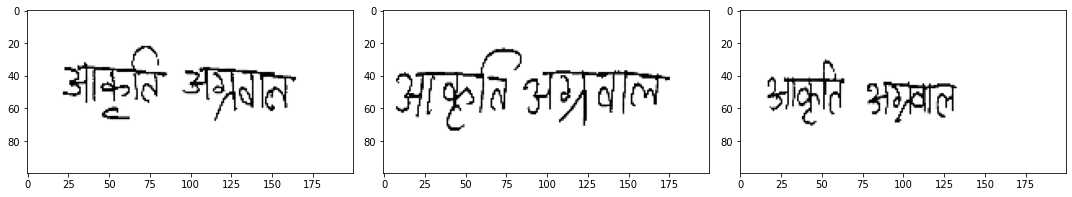

In [ ]:
i = 0
plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(X[i][0],'gray')
plt.subplot(132)
plt.imshow(X[i][15],'gray')
plt.subplot(133)
plt.imshow(X[i][40],'gray')
plt.tight_layout()
plt.show()

In [ ]:
print(X.shape) 
print(y.shape) 

(160, 54, 100, 200, 3)
(8640,)


In [ ]:
y

array([  1,   1,   1, ..., 160, 160, 160])

In [ ]:
# user_dict

In [ ]:
X.shape

(160, 54, 100, 200, 3)

In [ ]:
X.reshape(X.shape[0]*X.shape[1],X.shape[2],X.shape[3],X.shape[4]).shape

(8640, 100, 200, 3)

In [ ]:
y.shape

(8640,)

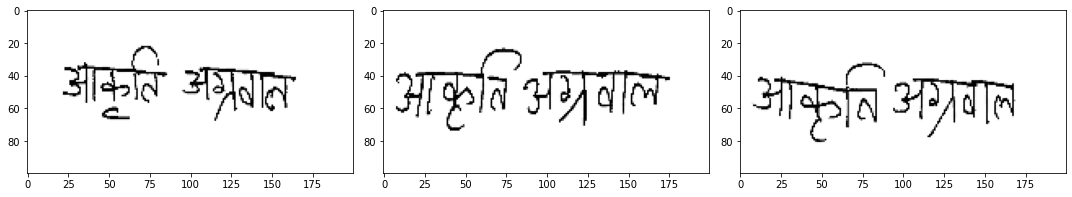

In [ ]:
imgs = X.reshape(X.shape[0]*X.shape[1],X.shape[2],X.shape[3],X.shape[4])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(imgs[0],'gray')
plt.subplot(132)
plt.imshow(imgs[15],'gray')
plt.subplot(133)
plt.imshow(imgs[20],'gray')
plt.tight_layout()
plt.show()

## Make Pairs

In [ ]:
print(X.reshape(X.shape[0]*X.shape[1],X.shape[2],X.shape[3],X.shape[4]).shape)
print(y.shape)

(8640, 100, 200, 3)
(8640,)


In [ ]:
np.unique(y)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160])

In [ ]:
list(range(1,6))

[1, 2, 3, 4, 5]

In [ ]:
np.where(y == 1)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [ ]:
np.where(y == 160)[0]

array([8586, 8587, 8588, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596,
       8597, 8598, 8599, 8600, 8601, 8602, 8603, 8604, 8605, 8606, 8607,
       8608, 8609, 8610, 8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618,
       8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629,
       8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8639],
      dtype=int64)

In [ ]:
# make pairs
def make_pairs(x, y):

    num_classes = max(y) + 1
    user_indices = [np.where(y == i)[0] for i in range(1,num_classes)]
    user_indices= [None] + user_indices

    x =  x.reshape(x.shape[0]*x.shape[1],x.shape[2],x.shape[3],x.shape[4])

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]  
        label1 = y[idx1]
        idx2 = random.choice(user_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1 or label2==0:
            label2 = random.randint(0, num_classes-1)
        idx2 = random.choice(user_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

In [ ]:
pairs_train, labels_train = make_pairs(X, y)

In [ ]:
print(pairs_train.shape)
print(labels_train.shape)

(17280, 2, 100, 200, 3)
(17280,)


In [ ]:
pickle.dump((pairs_train,labels_train), open("data/train.pickle", "wb") )

In [ ]:
(pairs_train, labels_train) = pickle.load(open("data/train.pickle", "rb"))

In [ ]:
print(pairs_train.shape)
print(labels_train.shape)

(17280, 2, 100, 200, 3)
(17280,)


0


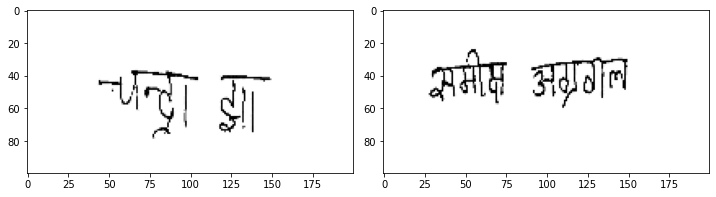

In [ ]:
i = 267

print(labels_train[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs_train[i][0],'gray')
plt.subplot(132)
plt.imshow(pairs_train[i][1],'gray')
plt.tight_layout()
plt.show()

# Data 2

In [ ]:
path = "dataset/train/"

In [ ]:
dir_list = os.listdir(path)
len(dir_list)

160

In [ ]:
data = []
for directory in dir_list:
    images = os.listdir(path+directory)
    images = [path+directory+'/'+x for x in images]
    data.append(images)

In [ ]:
data = []
for directory in dir_list:
    images = os.listdir(path+directory)
    images = [path+directory+'/'+x for x in images]
    data.append(images[30:])

In [ ]:
len(data)

160

In [ ]:
len(data[0]) 

24

In [ ]:
data[6][:]

['dataset/train/007/H-S-7-G-01.tif',
 'dataset/train/007/H-S-7-G-02.tif',
 'dataset/train/007/H-S-7-G-03.tif',
 'dataset/train/007/H-S-7-G-04.tif',
 'dataset/train/007/H-S-7-G-05.tif',
 'dataset/train/007/H-S-7-G-06.tif',
 'dataset/train/007/H-S-7-G-07.tif',
 'dataset/train/007/H-S-7-G-08.tif',
 'dataset/train/007/H-S-7-G-09.tif',
 'dataset/train/007/H-S-7-G-10.tif',
 'dataset/train/007/H-S-7-G-11.tif',
 'dataset/train/007/H-S-7-G-12.tif',
 'dataset/train/007/H-S-7-G-13.tif',
 'dataset/train/007/H-S-7-G-14.tif',
 'dataset/train/007/H-S-7-G-15.tif',
 'dataset/train/007/H-S-7-G-16.tif',
 'dataset/train/007/H-S-7-G-17.tif',
 'dataset/train/007/H-S-7-G-18.tif',
 'dataset/train/007/H-S-7-G-19.tif',
 'dataset/train/007/H-S-7-G-20.tif',
 'dataset/train/007/H-S-7-G-21.tif',
 'dataset/train/007/H-S-7-G-22.tif',
 'dataset/train/007/H-S-7-G-23.tif',
 'dataset/train/007/H-S-7-G-24.tif']

In [ ]:
img_h, img_w, img_ch = 100, 200 , 3

In [ ]:
def visualize_sample_signature(choose=False,idx=0):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 10))

    if choose:
        k = idx
    else:
        k = np.random.randint(len(data))
    print(k)

    img_names = random.sample(data[k], 3)
    print(img_names)

    img1 = cv2.imread(img_names[0])
    img2 = cv2.imread(img_names[1])
    img3 = cv2.imread(img_names[2])

    img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    img3 = cv2.resize(img3, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)

    ax1.imshow(img1, cmap = 'gray')
    ax2.imshow(img2, cmap = 'gray')
    ax3.imshow(img3, cmap = 'gray')

    ax1.set_title(0)
    ax1.set_xlabel(0)
    # ax1.axis('off')
    ax2.set_title(1)
    ax2.set_xlabel(1)
    # ax2.axis('off')
    ax3.set_title(2)
    ax3.set_xlabel(2)
    # ax3.axis('off')
    plt.tight_layout()
    plt.show()

55
['dataset/train/056/H-S-56-G-13.tif', 'dataset/train/056/H-S-56-G-22.tif', 'dataset/train/056/H-S-56-G-08.tif']


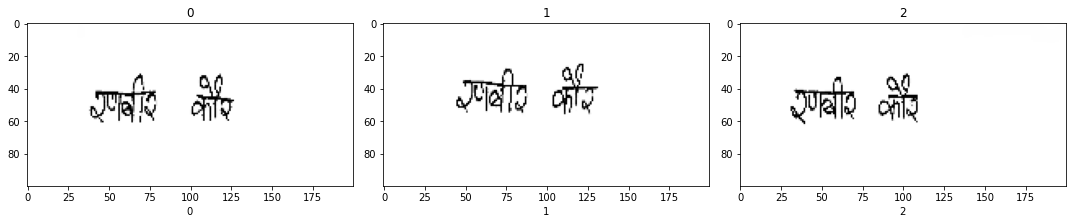

In [ ]:
visualize_sample_signature(choose=True,idx=55)

In [ ]:
# make pairs
def generate_batch(x):

    pairs = []
    labels = []
    
    for label1 in range(len(data)):
        for idx1 in range(len(data[label1])):
            # add a matching example
            x1 = data[label1][idx1]
            idx2 = random.randint(0,len(data[label1])-1)
            x2 = data[label1][idx2]

            pairs += [[x1, x2]]
            labels += [1]
        
            # add a not matching example
            label2 = random.randint(0, len(data)-1)
            while label2 == label1:
                label2 = random.randint(0, len(data)-1)

            idx2 = random.randint(0,len(data[label2])-1)
            x2 = data[label2][idx2]
            
            pairs += [[x1, x2]]
            labels += [0]



    # pairs, labels = shuffle(pairs, labels)

    return np.array(pairs), np.array(labels)

In [ ]:
pairs, labels = generate_batch(data)

In [ ]:
print(pairs.shape)
print(labels.shape)

(17280, 2)
(17280,)


In [ ]:
i = 2
print(labels[i])
print(pairs[i])
print(labels[i+1])
print(pairs[i+1])

1
['dataset/train/001/H-S-1-F-02.tif' 'dataset/train/001/H-S-1-F-22.tif']
0
['dataset/train/001/H-S-1-F-02.tif' 'dataset/train/056/H-S-56-F-12.tif']


In [ ]:
def generate_batch(data, batch_size = 32):

    while True:

        all_pairs = []
        labels = []
        
        for label1 in range(len(data)):
            for idx1 in range(len(data[label1])):
                # add a matching example
                x1 = data[label1][idx1]
                idx2 = random.randint(0,len(data[label1])-1)
                x2 = data[label1][idx2]

                all_pairs += [[x1, x2]]
                labels += [1]
            
                # add a not matching example
                label2 = random.randint(0, len(data)-1)
                while label2 == label1:
                    label2 = random.randint(0, len(data)-1)

                idx2 = random.randint(0,len(data[label2])-1)
                x2 = data[label2][idx2]
                
                all_pairs += [[x1, x2]]
                labels += [0]



        # all_pairs, labels = shuffle(all_pairs, labels)

        k = 0
        pairs=[]
        targets=[]

        for ix, pair in enumerate(all_pairs):
            img1 = cv2.imread(pair[0])
            img2 = cv2.imread(pair[1])
            img1 = cv2.resize(img1, (img_w, img_h))
            img2 = cv2.resize(img2, (img_w, img_h))
            img1 = img1.astype('float32')
            img2 = img2.astype('float32')
            img1 /= 255
            img2 /= 255

            pairs.append([img1, img2])
            targets.append(labels[ix])

            k += 1
            if k == batch_size:
                # yield np.array(pairs), np.array(targets)
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
                targets=np.zeros((batch_size,))

In [ ]:
def generate_batch(data, batch_size = 32):

    while True:

        all_pairs = []
        labels = []
        
        for label1 in range(len(data)):
            for idx1 in range(len(data[label1])):
                # add a matching example
                x1 = data[label1][idx1]
                idx2 = random.randint(0,len(data[label1])-1)
                x2 = data[label1][idx2]

                all_pairs += [[x1, x2]]
                labels += [1]
            
                # add a not matching example
                label2 = random.randint(0, len(data)-1)
                while label2 == label1:
                    label2 = random.randint(0, len(data)-1)

                idx2 = random.randint(0,len(data[label2])-1)
                x2 = data[label2][idx2]
                
                all_pairs += [[x1, x2]]
                labels += [0]



        # all_pairs, labels = shuffle(all_pairs, labels)

        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            img1 = cv2.imread(pair[0])
            img2 = cv2.imread(pair[1])
            img1 = cv2.resize(img1, (img_w, img_h))
            img2 = cv2.resize(img2, (img_w, img_h))
            img1 = img1.astype('float32')
            img2 = img2.astype('float32')
            img1 /= 255
            img2 /= 255

            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = labels[ix]

            k += 1
            if k == batch_size:
                # yield np.array(pairs), np.array(targets)
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
                targets=np.zeros((batch_size,))

### visualize generate_batch

In [ ]:
ff=generate_batch(data, batch_size = 32)
pairs, targets = next(ff)
pairs, targets = next(ff)
# pairs, targets = next(ff)
# pairs, targets = next(ff)

pairs, targets = np.array(pairs), np.array(targets)

In [ ]:
print(pairs.shape)
print(targets.shape)

(2, 32, 100, 200, 3)
(32,)


In [ ]:
print(pairs[0].shape)

(32, 100, 200, 3)


In [ ]:
print(targets)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0.]


0.0


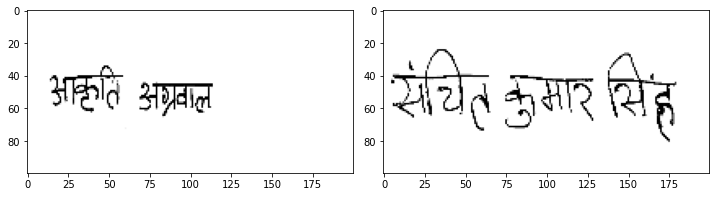

In [ ]:
i = 15

print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

In [ ]:
i = 5

print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[i][0],'gray')
plt.subplot(132)
plt.imshow(pairs[i][1],'gray')
plt.tight_layout()
plt.show()

0.0


IndexError: index 5 is out of bounds for axis 0 with size 2

# Data 3

In [ ]:
# !unzip /content/drive/MyDrive/graduation\ project\ \(ML\)/datasets/BHSig260.zip

In [ ]:
# path = "dataset/train/"

In [ ]:
path1 = "/content/BHSig260/Hindi/"
path2 = "/content/BHSig260/Bengali/"

In [ ]:
img_h, img_w, img_ch = 150, 300, 1

In [ ]:
# dir_list = os.listdir(path)
# len(dir_list)

In [ ]:
dir_list1 = next(os.walk(path1))[1]
dir_list1.sort()
len(dir_list1)

160

In [ ]:
dir_list2 = next(os.walk(path2))[1]
dir_list2.sort()
len(dir_list2)

100

In [ ]:
dir_list1 = shuffle(dir_list1)
dir_list2 = shuffle(dir_list2)

In [ ]:
dir_list1[:20], dir_list2[:20]

(['100',
  '012',
  '149',
  '087',
  '035',
  '107',
  '054',
  '151',
  '061',
  '043',
  '111',
  '007',
  '156',
  '145',
  '025',
  '130',
  '154',
  '157',
  '138',
  '070'],
 ['058',
  '017',
  '088',
  '069',
  '090',
  '085',
  '001',
  '023',
  '020',
  '100',
  '008',
  '014',
  '081',
  '096',
  '005',
  '031',
  '009',
  '068',
  '027',
  '029'])

In [ ]:
orig_groups, forg_groups = [], []

In [ ]:
for i,directory in enumerate(dir_list1):
  if i==20:
    break
  images = os.listdir(path1+directory)
  images.sort()
  images = [path1+directory+'/'+x for x in images]
  forg_groups.append(images[:30]) 
  orig_groups.append(images[30:]) 

In [ ]:
for i,directory in enumerate(dir_list2):
  if i==20:
    break
  images = os.listdir(path2+directory)
  images.sort()
  images = [path2+directory+'/'+x for x in images]
  forg_groups.append(images[:30]) 
  orig_groups.append(images[30:])

In [ ]:
print(len(orig_groups))
print(len(forg_groups))
print(len(orig_groups[0]))
print(len(forg_groups[0]))

40
40
24
30


In [ ]:
orig_groups, forg_groups = shuffle(orig_groups, forg_groups)

In [ ]:
orig_groups[10], forg_groups[10]

(['/content/BHSig260/Bengali/036/B-S-36-G-01.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-02.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-03.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-04.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-05.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-06.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-07.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-08.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-09.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-10.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-11.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-12.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-13.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-14.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-15.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-16.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-17.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-18.tif',
  '/content/BHSig260/Bengali/036/B-S-36-G-19.tif',
  '/content/BHSig260/Bengali/03

In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]
print(orig_lengths)
print(forg_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,

In [ ]:
# orig_train, orig_val, orig_test = orig_groups[:120], orig_groups[120:140], orig_groups[140:]
# forg_train, forg_val, forg_test = forg_groups[:120], forg_groups[120:140], forg_groups[140:]

In [ ]:
# orig_val, orig_test, orig_train = orig_groups[0:20], orig_groups[20:40], orig_groups[40:]
# forg_val, forg_test, forg_train = forg_groups[0:20], forg_groups[20:40], forg_groups[40:]

In [ ]:
# orig_train, orig_val = orig_groups[:220], orig_groups[220:]
# forg_train, forg_val = forg_groups[:220], forg_groups[220:]

In [ ]:
orig_train, orig_val = orig_groups[25:85], orig_groups[240:]
forg_train, forg_val = forg_groups[25:85], forg_groups[240:]

In [ ]:
len(orig_train), len(orig_val)

(60, 20)

In [ ]:
# forg_groups[0]

In [ ]:
orig_train[0], orig_val[0]

(['/content/BHSig260/Hindi/100/H-S-100-G-01.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-02.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-03.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-04.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-05.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-06.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-07.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-08.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-09.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-10.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-11.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-12.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-13.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-14.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-15.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-16.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-17.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-18.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-19.tif',
  '/content/BHSig260/Hindi/100/H-S-100-G-20.tif',


In [ ]:
# # Delete unnecessary variables
# del orig_groups, forg_groups

In [ ]:
def visualize_sample_signature(choose=False,idx=0):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 7))
    
    if choose:
        k = idx
    else:
        k = np.random.randint(len(orig_groups))
    print(k)

    orig_img_names = random.sample(orig_groups[k], 2)
    forg_img_name = random.sample(forg_groups[k], 1)
    print(orig_img_names+forg_img_name)

    orig_img1 = cv2.imread(orig_img_names[0])
    orig_img2 = cv2.imread(orig_img_names[1])
    forg_img = plt.imread(forg_img_name[0])

    orig_img1 = cv2.resize(orig_img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    forg_img = cv2.resize(forg_img, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.set_xlabel(1)
    # ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.set_xlabel(2)
    # ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.set_xlabel(3)
    # ax3.axis('off')
    plt.tight_layout()
    plt.show()

0
['/content/BHSig260/Bengali/016/B-S-16-G-14.tif', '/content/BHSig260/Bengali/016/B-S-16-G-12.tif', '/content/BHSig260/Bengali/016/B-S-16-F-04.tif']


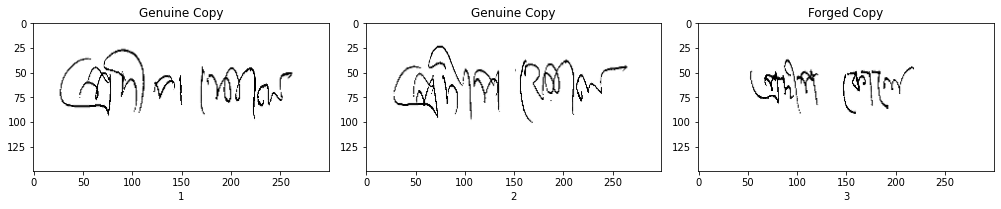

In [ ]:
visualize_sample_signature(choose=True,idx=0)

In [ ]:
num_samples = 0
pairss = []

In [ ]:
num_samples

0

In [ ]:
kernel = np.ones((9,9),np.uint8) # default
def preprocessor_img(path, image_shape):
  image = cv2.imread(path,0)
  blured = cv2.GaussianBlur(image, (9,9), 0)
  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=20)
  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea) 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(cropped, image_shape, interpolation=cv2.INTER_LANCZOS4)
  resized_blured = cv2.GaussianBlur(resized, (9,9), 0)
  threshold, resized_binary = cv2.threshold(resized_blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  return resized_binary

In [ ]:
def generate_batch(orig_data, forg_data, batch_size = 32):

    # global num_samples, pairss

    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 288 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 160 * 276 = 44160
        # Total number of Genuine-Forged pairs = 160 * 288 = 46080
        # Total no. of data points = 44160 + 46080 = 90240

        for orig, forg in zip(orig_data, forg_data):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)

        # print(len(all_pairs))
        # num_samples = len(all_pairs) 
        # pairss = all_pairs

        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            # img1 = preprocessor_img(pair[0], (img_w, img_h))
            # img2 = preprocessor_img(pair[1], (img_w, img_h))
            img1 = cv2.imread(pair[0],0)
            img2 = cv2.imread(pair[1],0)
            img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img1 = img1.astype('float32')
            img2 = img2.astype('float32')
            img1 /= 255
            img2 /= 255
            img1 = np.atleast_3d(img1)
            img2 = np.atleast_3d(img2)
            # img2 = img2[...,np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]

            k += 1
            if k == batch_size:
                # yield np.array(pairs), np.array(targets)
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
                targets=np.zeros((batch_size,))

### visualize generate_batch

In [ ]:
ff = generate_batch(orig_val, forg_val, batch_size = 32)
pairs, targets = next(ff)
# pairs, targets = next(ff)
# pairs, targets = next(ff)
# pairs, targets = next(ff)

pairs, targets = np.array(pairs), np.array(targets)

In [ ]:
# print(num_samples)

In [ ]:
# del pairs,targets

In [ ]:
print(pairs.shape)
print(targets.shape)

(2, 32, 150, 300, 1)
(32,)


In [ ]:
print(pairs[0].shape)

(32, 150, 300, 1)


In [ ]:
print(targets)

[1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0.]


In [ ]:
i = 1

In [ ]:
# pairss[i]

In [ ]:
# pairss[4%32*1]

0.0


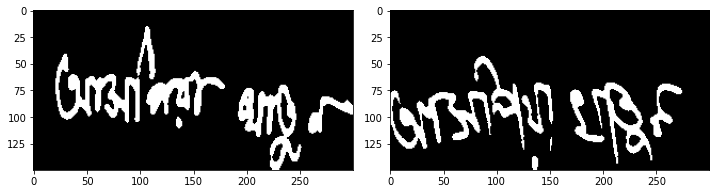

In [ ]:
i = 2
print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

# Data 4

In [ ]:
img_h, img_w, img_ch = 150, 300, 1
image_shape = (img_h, img_w, img_ch)
image_shape

(150, 300, 1)

In [ ]:
path = "/content/cedar/"

In [ ]:
dir_list = next(os.walk(path))[1]
dir_list.sort(key = int)
len(dir_list)

55

In [ ]:
dir_list = shuffle(dir_list)

In [ ]:
dir_list[:30]

['9',
 '35',
 '20',
 '36',
 '41',
 '23',
 '3',
 '42',
 '21',
 '43',
 '44',
 '32',
 '39',
 '34',
 '24',
 '5',
 '47',
 '16',
 '30',
 '7',
 '54',
 '13',
 '49',
 '45',
 '28',
 '6',
 '50',
 '31',
 '40',
 '38']

In [ ]:
orig_groups, forg_groups = [], []

In [ ]:
for i,directory in enumerate(dir_list):
  if i==30:
    break
  images = os.listdir(path+directory)
  images.sort()
  images = [path+directory+'/'+x for x in images]
  forg_groups.append(images[:24]) 
  orig_groups.append(images[24:]) 

In [ ]:
print(len(orig_groups))
print(len(forg_groups))
print(len(orig_groups[0]))
print(len(forg_groups[0]))

70
70
24
30


In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]
print(orig_lengths)
print(forg_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [ ]:
# orig_groups[20], forg_groups[20]

In [ ]:
orig_groups, forg_groups = shuffle(orig_groups, forg_groups)

In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]
print(orig_lengths)
print(forg_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
[24, 30, 30, 30, 24, 30, 24, 24, 30, 30, 24, 30, 30, 24, 30, 24, 30, 30, 30, 30, 30, 30, 30, 24, 24, 30, 24, 30, 30, 30]


In [ ]:
# forg_groups[0], orig_groups[0]

In [ ]:
orig_train, orig_val = orig_groups[:45], orig_groups[45:]
forg_train, forg_val = forg_groups[:45], forg_groups[45:]

In [ ]:
# orig_train, orig_val = orig_groups[:9], orig_groups[9:]
# forg_train, forg_val = forg_groups[:9], forg_groups[9:]

In [ ]:
orig_train, orig_val =  orig_groups[:25], orig_groups[25:]
forg_train, forg_val =  forg_groups[:25], forg_groups[25:]

In [ ]:
len(orig_train), len(orig_val), len(forg_train), len(forg_val)

(25, 5, 25, 5)

In [ ]:
# orig_train[0], forg_train[0]

In [ ]:
# # Delete unnecessary variables
# del orig_groups, forg_groups

In [ ]:
def visualize_sample_signature(choose=False,idx=0):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 7))
    
    if choose:
        k = idx
    else:
        k = np.random.randint(len(orig_groups))
    print(k)

    orig_img_names = random.sample(orig_groups[k], 2)
    forg_img_name = random.sample(forg_groups[k], 1)
    print(orig_img_names+forg_img_name)

    orig_img1 = cv2.imread(orig_img_names[0])
    orig_img2 = cv2.imread(orig_img_names[1])
    forg_img = plt.imread(forg_img_name[0])

    orig_img1 = cv2.resize(orig_img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    forg_img = cv2.resize(forg_img, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.set_xlabel(1)
    # ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.set_xlabel(2)
    # ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.set_xlabel(3)
    # ax3.axis('off')
    plt.tight_layout()
    plt.show()

25
['/content/BHSig260/Hindi/146/H-S-146-G-17.tif', '/content/BHSig260/Hindi/146/H-S-146-G-10.tif', '/content/BHSig260/Hindi/146/H-S-146-F-04.tif']


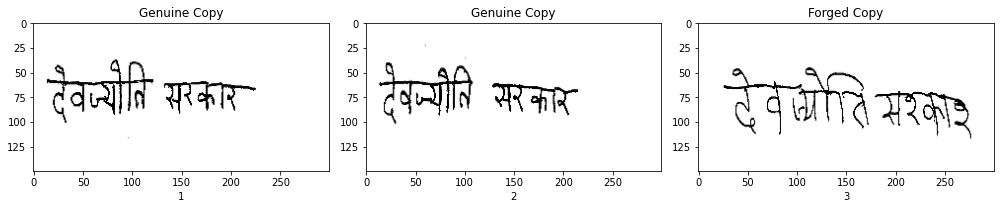

In [ ]:
visualize_sample_signature(choose=True,idx=25)

In [ ]:
kernel = np.ones((9,9),np.uint8) # default
def preprocessor_img(path, image_shape):
  image = cv2.imread(path,0)
  blured = cv2.GaussianBlur(image, (9,9), 0)
  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=20)
  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea) 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(cropped, image_shape, interpolation=cv2.INTER_LANCZOS4)
  resized_blured = cv2.GaussianBlur(resized, (9,9), 0)
  threshold, resized_binary = cv2.threshold(resized_blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  return resized_binary

In [ ]:
# num_samples=0

In [ ]:
def generate_batch(orig_data, forg_data, batch_size = 32):

    # global num_samples, pairss

    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 288 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 160 * 276 = 44160
        # Total number of Genuine-Forged pairs = 160 * 288 = 46080
        # Total no. of data points = 44160 + 46080 = 90240

        for orig, forg in zip(orig_data, forg_data):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)

        # print(len(all_pairs))
        # num_samples = len(all_pairs) 
        # pairss = all_pairs

        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            # img1 = preprocessor_img(pair[0], (img_w, img_h))
            # img2 = preprocessor_img(pair[1], (img_w, img_h))
            img1 = cv2.imread(pair[0],0)
            img2 = cv2.imread(pair[1],0)
            img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img1 = img1.astype('float32')
            img2 = img2.astype('float32')
            img1 /= 255
            img2 /= 255
            img1 = np.atleast_3d(img1)
            img2 = np.atleast_3d(img2)
            # img2 = img2[...,np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]

            k += 1
            if k == batch_size:
                # yield np.array(pairs), np.array(targets)
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
                targets=np.zeros((batch_size,))

### visualize generate_batch

In [ ]:
ff = generate_batch(orig_train, forg_train, batch_size = 32)
pairs, targets = next(ff)
pairs, targets = np.array(pairs), np.array(targets)

In [ ]:
# num_samples

In [ ]:
print(pairs.shape)
print(targets.shape)

(2, 32, 150, 300, 1)
(32,)


In [ ]:
print(pairs[0].shape)

(32, 150, 300, 1)


In [ ]:
print(targets)

[1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1.]


In [ ]:
i = 4

print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

NameError: ignored

# Data 5 -- Test dutch

In [ ]:
img_h, img_w, img_ch = 150, 300, 1
image_shape = (img_h, img_w, img_ch)
image_shape

(150, 300, 1)

In [ ]:
path = "/content/dutch/"

In [ ]:
dir_list = next(os.walk(path))[1]
dir_list.sort(key = int)
len(dir_list)

10

In [ ]:
orig_groups, forg_groups = [], []

In [ ]:
for i,directory in enumerate(dir_list):
  # if i==10:
  #   break
  images = os.listdir(path+directory)
  images.sort()
  images = [path+directory+'/'+x for x in images]
  forg_groups.append(images[:24]) 
  orig_groups.append(images[24:]) 

In [ ]:
print(len(forg_groups))
print(len(orig_groups))
print(len(forg_groups[0]))
print(len(orig_groups[0]))

10
10
24
12


In [ ]:
forg_lengths = [len(x) for x in forg_groups]
orig_lengths = [len(x) for x in orig_groups]
print(forg_lengths)
print(orig_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [ ]:
# orig_groups[30], forg_groups[30]

In [ ]:
def visualize_sample_signature(choose=False,idx=0):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 7))
    
    if choose:
        k = idx
    else:
        k = np.random.randint(len(orig_groups))
    print(k)

    orig_img_names = random.sample(orig_groups[k], 2)
    forg_img_name = random.sample(forg_groups[k], 1)
    print(orig_img_names+forg_img_name)

    orig_img1 = cv2.imread(orig_img_names[0],0)
    orig_img2 = cv2.imread(orig_img_names[1],0)
    forg_img = cv2.imread(forg_img_name[0],0)

    orig_img1 = cv2.resize(orig_img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    forg_img = cv2.resize(forg_img, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.set_xlabel(1)
    # ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.set_xlabel(2)
    # ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.set_xlabel(3)
    # ax3.axis('off')
    plt.tight_layout()
    plt.show()

7
['/content/dutch/08/14_024.PNG', '/content/dutch/08/19_024.PNG', '/content/dutch/08/04_0120024.PNG']


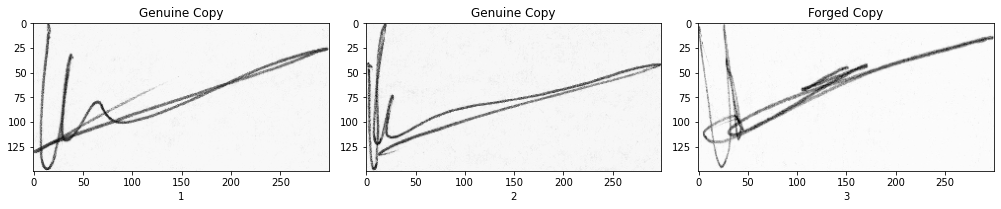

In [ ]:
visualize_sample_signature(choose=True,idx=7)

In [ ]:
kernel = np.ones((9,9),np.uint8) # default
def preprocessor_img(path, image_shape):
  image = cv2.imread(path,0)
  blured = cv2.GaussianBlur(image, (9,9), 0)
  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=30)
  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea) 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(cropped, image_shape, interpolation=cv2.INTER_LANCZOS4)
  # resized_blured = cv2.GaussianBlur(resized, (9,9), 0)
  threshold, resized_binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return resized_binary

In [ ]:
num_samples = 0

In [ ]:
def generate_batch(orig_data, forg_data, batch_size = 32):

    global num_samples

    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 288 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 160 * 276 = 44160
        # Total number of Genuine-Forged pairs = 160 * 288 = 46080
        # Total no. of data points = 44160 + 46080 = 90240

        for orig, forg in zip(orig_data, forg_data):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
              forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, len(forg)))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)

        # print(len(all_pairs))
        num_samples = len(all_pairs) 
        # pairss = all_pairs

        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            img1 = preprocessor_img(pair[0], (img_w, img_h))
            img2 = preprocessor_img(pair[1], (img_w, img_h))
            # img1 = cv2.imread(pair[0],0)
            # img2 = cv2.imread(pair[1],0)
            # img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            # img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img1 = img1.astype('float32')
            img2 = img2.astype('float32')
            img1 /= 255
            img2 /= 255
            img1 = np.atleast_3d(img1)
            img2 = np.atleast_3d(img2)
            # img2 = img2[...,np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]

            k += 1
            if k == batch_size:
                # yield np.array(pairs), np.array(targets)
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
                targets=np.zeros((batch_size,))

### visualize generate_batch

In [ ]:
ff = generate_batch(orig_groups, forg_groups, batch_size = 32)
pairs, targets = next(ff)
pairs, targets = np.array(pairs), np.array(targets)

In [ ]:
num_samples

3540

In [ ]:
print(pairs.shape)
print(targets.shape)

(2, 32, 150, 300, 1)
(32,)


In [ ]:
print(pairs[0].shape)

(32, 150, 300, 1)


In [ ]:
print(targets)

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0.]


1.0


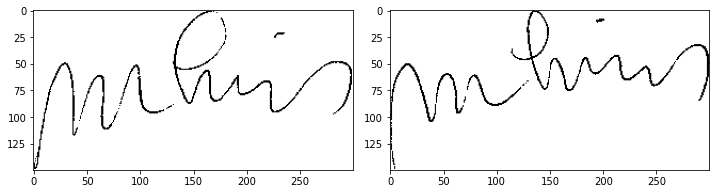

In [ ]:
i = 2

print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

### evaluate

In [ ]:
batch_sz = 32

size = len(orig_groups)

num_test_samples = 66*10 + 60*10
num_test_samples = 3540

num_test_samples, num_test_samples//batch_sz, size, batch_sz

(3540, 110, 10, 32)

In [ ]:
# dutch
ev = siamese_net.evaluate(
                            generate_batch(orig_groups, forg_groups, batch_size = batch_sz), 
                            steps = num_test_samples//batch_sz,
                            )
ev

110/110 [==============================] - 91s 831ms/step - loss: 0.2614 - accuracy: 0.8949


[0.26138392090797424, 0.8948863744735718]

# Data 6 -- Test kaggle

In [ ]:
img_h, img_w, img_ch = 150, 300, 1
image_shape = (img_h, img_w, img_ch)
image_shape

(150, 300, 1)

In [ ]:
path = "/content/kaggle30/"

In [ ]:
dir_list = next(os.walk(path))[1]
dir_list.sort(key = int)
len(dir_list)

30

In [ ]:
dir_list = shuffle(dir_list)

In [ ]:
dir_list = dir_list[15:25]

In [ ]:
dir_list[:10]

['21', '11', '20', '27', '30', '22', '1', '10', '13', '16']

In [ ]:
orig_groups, forg_groups = [], []

In [ ]:
for i,directory in enumerate(dir_list):
  # if i==10:
  #   break
  images = os.listdir(path+directory)
  images.sort()
  images = [path+directory+'/'+x for x in images]
  forg_groups.append(images[:5]) 
  orig_groups.append(images[5:]) 

In [ ]:
print(len(forg_groups))
print(len(orig_groups))
print(len(forg_groups[0]))
print(len(orig_groups[0]))

30
30
5
5


In [ ]:
forg_lengths = [len(x) for x in forg_groups]
orig_lengths = [len(x) for x in orig_groups]
print(forg_lengths)
print(orig_lengths)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [ ]:
# orig_groups[40], forg_groups[40]

In [ ]:
orig_groups, forg_groups = shuffle(orig_groups, forg_groups)

In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]
print(orig_lengths)
print(forg_lengths)

[24, 24, 24, 12, 5, 24, 5, 24, 5, 5, 24, 24, 24, 5, 24, 24, 12, 5, 24, 12, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 12, 24, 5, 5, 24, 24, 12, 5, 24, 24, 24, 24, 24, 24, 5, 5, 24, 24, 5, 24, 5, 5, 24, 24, 12, 24, 5, 24, 24, 5, 24, 12, 12, 24, 24, 24, 24, 24, 24, 5, 24, 5, 24, 24, 5, 5, 5, 24, 24, 24, 24, 24, 12, 5, 5, 5, 24, 24, 24, 5, 24, 5, 24, 5, 24, 5, 12, 24, 24, 24, 5, 24, 24, 24, 24, 5, 24, 24]
[30, 24, 24, 24, 5, 24, 5, 30, 5, 5, 24, 30, 30, 5, 30, 30, 24, 5, 30, 24, 30, 24, 30, 30, 30, 24, 30, 30, 30, 24, 24, 30, 24, 24, 5, 5, 30, 24, 24, 5, 30, 24, 30, 24, 30, 24, 5, 5, 30, 30, 5, 30, 5, 5, 30, 24, 24, 30, 5, 30, 24, 5, 24, 24, 24, 24, 30, 24, 24, 30, 24, 5, 30, 5, 30, 30, 5, 5, 5, 24, 30, 30, 30, 24, 24, 5, 5, 5, 30, 24, 24, 5, 24, 5, 30, 5, 24, 5, 24, 30, 30, 24, 5, 24, 24, 30, 30, 5, 24, 30]


In [ ]:
orig_train, orig_val = orig_groups[:90], orig_groups[90:]
forg_train, forg_val = forg_groups[:90], forg_groups[90:]

In [ ]:
len(orig_train), len(orig_val), len(forg_train), len(forg_val)

(90, 20, 90, 20)

In [ ]:
i = 3
orig_groups[i], forg_groups[i]

(['/content/dutch/09/13_026.PNG',
  '/content/dutch/09/14_026.PNG',
  '/content/dutch/09/15_026.PNG',
  '/content/dutch/09/16_026.PNG',
  '/content/dutch/09/17_026.PNG',
  '/content/dutch/09/18_026.PNG',
  '/content/dutch/09/19_026.PNG',
  '/content/dutch/09/20_026.PNG',
  '/content/dutch/09/21_026.PNG',
  '/content/dutch/09/22_026.PNG',
  '/content/dutch/09/23_026.PNG',
  '/content/dutch/09/24_026.PNG'],
 ['/content/dutch/09/01_0119026.PNG',
  '/content/dutch/09/01_0123026.PNG',
  '/content/dutch/09/01_0125026.PNG',
  '/content/dutch/09/01_026.png',
  '/content/dutch/09/02_0119026.PNG',
  '/content/dutch/09/02_0123026.PNG',
  '/content/dutch/09/02_0125026.PNG',
  '/content/dutch/09/02_026.png',
  '/content/dutch/09/03_0119026.PNG',
  '/content/dutch/09/03_0123026.PNG',
  '/content/dutch/09/03_0125026.PNG',
  '/content/dutch/09/03_026.png',
  '/content/dutch/09/04_0119026.PNG',
  '/content/dutch/09/04_0123026.PNG',
  '/content/dutch/09/04_0125026.PNG',
  '/content/dutch/09/04_026.png',

In [ ]:
def visualize_sample_signature(choose=False,idx=0):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 7))
    
    if choose:
        k = idx
    else:
        k = np.random.randint(len(orig_groups))
    print(k)

    orig_img_names = random.sample(orig_groups[k], 2)
    forg_img_name = random.sample(forg_groups[k], 1)
    print(orig_img_names+forg_img_name)

    orig_img1 = cv2.imread(orig_img_names[0],0)
    orig_img2 = cv2.imread(orig_img_names[1],0)
    forg_img = cv2.imread(forg_img_name[0],0)

    orig_img1 = cv2.resize(orig_img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    forg_img = cv2.resize(forg_img, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.set_xlabel(1)
    # ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.set_xlabel(2)
    # ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.set_xlabel(3)
    # ax3.axis('off')
    plt.tight_layout()
    plt.show()

16
['/content/kaggle30/14/g (4).png', '/content/kaggle30/14/g (3).png', '/content/kaggle30/14/f (1).png']


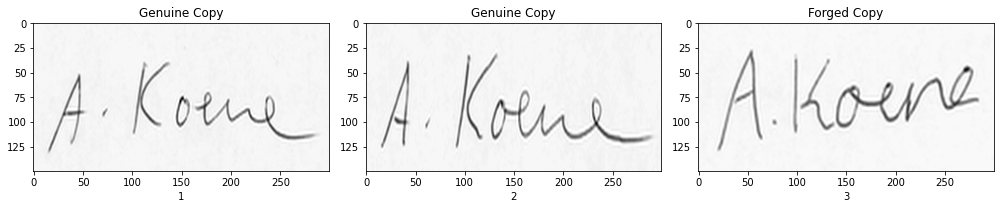

In [ ]:
visualize_sample_signature(choose=True,idx=16)

In [ ]:
# list(itertools.combinations(orig_groups[0], 2)) 
len(list(itertools.combinations(orig_groups[0], 2)))

10

In [ ]:
# list(itertools.combinations(orig_groups[2], 2)) 
len(list(itertools.combinations(orig_groups[2], 2)))

10

In [ ]:
# list(itertools.combinations(orig_groups[5], 2))
len(list(itertools.combinations(orig_groups[5], 2)))

10

In [ ]:
orig_groups[0][0:1]

['/content/kaggle30/1/g (1).png',
 '/content/kaggle30/1/g (2).png',
 '/content/kaggle30/1/g (3).png',
 '/content/kaggle30/1/g (4).png',
 '/content/kaggle30/1/g (5).png']

In [ ]:
i = 16
img_num=0
list(itertools.product(orig_groups[i][img_num:img_num+1], random.sample(forg_groups[i], len(forg_groups[i]))))

[('/content/dutch/05/13_020.PNG', '/content/dutch/05/05_020.png'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/04_0105020.PNG'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/01_0117020.PNG'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/02_0127020.PNG'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/04_020.png'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/01_020.png'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/03_0105020.PNG'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/03_0213020.PNG'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/03_0117020.PNG'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/04_0213020.PNG'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/02_0213020.PNG'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/02_020.png'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/02_0101020.PNG'),
 ('/content/dutch/05/13_020.PNG', '/content/dutch/05/03_0101020.PNG'),
 ('/content/dutch/05/1

In [ ]:
random.sample(forg_groups[0], 5)

['/content/kaggle30/1/f (2).png',
 '/content/kaggle30/1/f (3).png',
 '/content/kaggle30/1/f (5).png',
 '/content/kaggle30/1/f (1).png',
 '/content/kaggle30/1/f (4).png']

In [ ]:
random.sample(forg_groups[0],len(forg_groups[0]))

['/content/BHSig260/Hindi/035/H-S-035-F-08.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-11.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-14.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-02.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-18.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-26.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-28.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-09.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-19.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-22.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-06.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-13.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-01.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-24.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-15.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-10.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-05.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-12.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-16.tif',
 '/content/BHSig260/Hindi/035/H-S-035-F-20.tif',
 '/content/BHSig260/

In [ ]:
print(np.random.randint(0,3))
print(random.randint(0,3))

2
3


In [ ]:
kernel = np.ones((9,9),np.uint8) # default
def preprocessor_img(path, image_shape):
  image = cv2.imread(path,0)
  blured = cv2.GaussianBlur(image, (9,9), 0)
  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=30)
  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea) 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(cropped, image_shape, interpolation=cv2.INTER_LANCZOS4)
  # resized_blured = cv2.GaussianBlur(resized, (9,9), 0)
  threshold, resized_binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return resized_binary

In [ ]:
num_samples = 0

In [ ]:
def generate_batch(orig_data, forg_data, batch_size = 32):

    global num_samples

    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 288 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 160 * 276 = 44160
        # Total number of Genuine-Forged pairs = 160 * 288 = 46080
        # Total no. of data points = 44160 + 46080 = 90240

        for orig, forg in zip(orig_data, forg_data):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
              forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, len(forg)))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)

        # print(len(all_pairs))
        num_samples = len(all_pairs) 
        # pairss = all_pairs

        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            img1 = preprocessor_img(pair[0], (img_w, img_h))
            img2 = preprocessor_img(pair[1], (img_w, img_h))
            # img1 = cv2.imread(pair[0],0)
            # img2 = cv2.imread(pair[1],0)
            # img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            # img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img1 = img1.astype('float32')
            img2 = img2.astype('float32')
            img1 /= 255
            img2 /= 255
            img1 = np.atleast_3d(img1)
            img2 = np.atleast_3d(img2)
            # img2 = img2[...,np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]

            k += 1
            if k == batch_size:
                # yield np.array(pairs), np.array(targets)
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
                targets=np.zeros((batch_size,))

### visualize generate_batch

In [ ]:
ff = generate_batch(orig_groups, forg_groups, batch_size = 32)
# ff = generate_batch(orig_train, forg_train, batch_size = 32)
# ff = generate_batch(orig_val, forg_val, batch_size = 32)


pairs, targets = next(ff)
pairs, targets = np.array(pairs), np.array(targets)

In [ ]:
num_samples

1050

In [ ]:
num_samples

12504

In [ ]:
print(pairs.shape)
print(targets.shape)

(2, 32, 150, 300, 1)
(32,)


In [ ]:
print(pairs[0].shape)

(32, 150, 300, 1)


In [ ]:
print(targets)

[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0.]


0.0


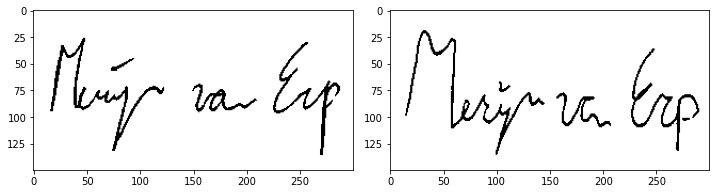

In [ ]:
i = 1

print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

### evaluate

In [ ]:
batch_sz = 32

size = len(orig_groups)

num_test_samples = 10*30 + 25*30
num_test_samples = 1050

num_test_samples, num_test_samples//batch_sz, size, batch_sz

(1050, 32, 30, 32)

In [ ]:
# kaggle30
ev = siamese_net.evaluate(
                            generate_batch(orig_groups, forg_groups, batch_size = batch_sz), 
                            steps = num_test_samples//batch_sz,
                            )
ev

32/32 [==============================] - 59s 2s/step - loss: 0.2600 - accuracy: 0.8994


[0.2599816620349884, 0.8994140625]

# Model

In [ ]:
# image_shape = (pairs.shape[2], pairs.shape[3], pairs.shape[4])
image_shape = (img_h, img_w, img_ch)
image_shape

(150, 300, 1)

In [ ]:
from tensorflow.keras.applications import DenseNet201

base_network = DenseNet201(weights=None, include_top=False, input_shape=image_shape)
base_network.summary()

In [ ]:
base_network.trainable = True

In [ ]:
# tf.keras.utils.plot_model(  base_network, 
#                             to_file=r"/content/drive/MyDrive/graduation project (ML)/model_5/base_network.png", 
#                             show_shapes=True, 
#                             show_layer_names=True, 
#                             show_dtype=True)

In [ ]:
# Define the tensors for the two input images
left_input = Input(image_shape)
right_input = Input(image_shape)
# Convolutional Neural Network
model = Sequential()
model.add(base_network)
model.add(Flatten())
# Generate the encodings (feature vectors) for the two images
encoded_l = model(left_input)
encoded_r = model(right_input)
# Add a customized layer to compute the absolute difference between the encodings
merge_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))([encoded_l, encoded_r])
# Add a dense layer with a sigmoid unit to generate the similarity score
prediction = Dense(1,activation='sigmoid')(merge_layer)
# Connect the inputs with the outputs
siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
siamese_net.summary()

In [ ]:
# tf.keras.utils.plot_model(siamese_net,
#                           to_file=r"/content/drive/MyDrive/graduation project (ML)/model_5/siamese_net.png", 
#                           show_shapes=True, 
#                           show_layer_names=True, 
#                           show_dtype=True)

In [ ]:
callbacks = [
  EarlyStopping(patience=15, restore_best_weights=True),
  CSVLogger(r"/content/drive/MyDrive/graduation project (ML)/model_5/model_history_log.csv", append=True),
  # ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001),
  ModelCheckpoint(r"/content/drive/MyDrive/graduation project (ML)/model_5/signet-{epoch:003d}.h5"),
  # ModelCheckpoint(r"/content/drive/MyDrive/graduation project (ML)/model_5/signet_Best_Model.h5", save_best_only=True)
]

In [ ]:
batch_sz = 32
num_train_samples = 276*120 + 288*120
num_val_samples = num_test_samples = 276*20 + 288*20

num_train_samples, num_val_samples, num_test_samples, num_train_samples//batch_sz

(67680, 11280, 11280, 2115)

In [ ]:
# rms = RMSprop(lr=1e-4, rho=0.9, epsilon=1e-08)
adam = Adam(lr=1e-6)
# rms = RMSprop()
# adam = Adam()

siamese_net.compile(loss = "binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
new_history = siamese_net.fit(  generate_batch(orig_train, forg_train, batch_sz),
                                steps_per_epoch = num_train_samples//batch_sz,
                                epochs=3,
                                validation_data = generate_batch(orig_val, forg_val, batch_sz),
                                validation_steps = num_val_samples//batch_sz,
                                callbacks = callbacks
                                )

In [ ]:
siamese_net.save(r"/content/drive/MyDrive/graduation project (ML)/model_5/model_3epoch")

In [ ]:
siamese_net.save(r"/content/drive/MyDrive/graduation project (ML)/model_5/model_3epoch.h5")

In [ ]:
siamese_net = keras.models.load_model(r"/content/drive/MyDrive/graduation project (ML)/model_5/Train 11/model_34.h5")

In [ ]:
siamese_net.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 69120)        18315712    input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 69120)        0           sequential[0][0]             

In [ ]:
callbacks = [
  EarlyStopping(patience=15, restore_best_weights=True),
  CSVLogger(r"/content/drive/MyDrive/graduation project (ML)/model_5/model_history_log.csv", append=True),
  ModelCheckpoint(r"/content/drive/MyDrive/graduation project (ML)/model_5/signet-{epoch:003d}.h5"),
  # ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001),
  # ModelCheckpoint(r"/content/drive/MyDrive/graduation project (ML)/model_5/signet_Best_Model.h5", save_best_only=True)
]

In [ ]:
batch_sz = 32
num_train_samples = 276*len(orig_train) + 288*len(orig_train)
num_val_samples = num_test_samples = 276*len(orig_val) + 288*len(orig_val)
num_train_samples, num_val_samples, num_test_samples, num_train_samples//batch_sz, num_val_samples//batch_sz, len(orig_train), len(orig_val)

(14100, 2820, 2820, 440, 88, 25, 5)

In [ ]:
# kaggle
batch_sz = 32
num_train_samples = 10*len(orig_train) + 25*len(orig_train)
num_val_samples = num_test_samples = 10*len(orig_val) + 25*len(orig_val)

num_train_samples, num_val_samples, num_test_samples, num_train_samples//batch_sz

(875, 175, 175, 27)

In [ ]:
# kaggle + dutch + cedar
batch_sz = 32
num_train_samples = 4221
num_val_samples = num_test_samples = 1349

num_train_samples, num_val_samples, num_test_samples, num_train_samples//batch_sz

(4221, 1349, 1349, 131)

In [ ]:
# kaggle + dutch + cedar + ban + hindi
batch_sz = 32
num_train_samples = 57486
num_val_samples = num_test_samples = 12504

num_train_samples, num_val_samples, num_train_samples//batch_sz, num_val_samples//batch_sz

(57486, 12504, 1796, 390)

In [ ]:
adam = Adam(lr=1e-6)
siamese_net.compile(loss = "binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
new_history = siamese_net.fit(  generate_batch(orig_train, forg_train, batch_sz),
                                steps_per_epoch = num_train_samples//batch_sz,
                                epochs=1,
                                validation_data = generate_batch(orig_val, forg_val, batch_sz),
                                validation_steps = num_val_samples//batch_sz,
                                callbacks = callbacks
                                )

1796/1796 [==============================] - 2112s 1s/step - loss: 0.0727 - accuracy: 0.9743 - val_loss: 0.5458 - val_accuracy: 0.8080


In [ ]:
siamese_net.save(r"/content/drive/MyDrive/graduation project (ML)/model_5/model_30epoch.h5")

In [ ]:
siamese_net.save(r"/content/drive/MyDrive/graduation project (ML)/model_5/model_30epoch")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/graduation project (ML)/model_5/model_16epoch/assets


In [ ]:
# keras.backend.clear_session()
# del siamese_net

In [ ]:
history = new_history

In [ ]:
print(siamese_net.metrics_names)
print(history.params)
print(history.history.keys())

['loss', 'accuracy']
{'verbose': 1, 'epochs': 3, 'steps': 2115}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


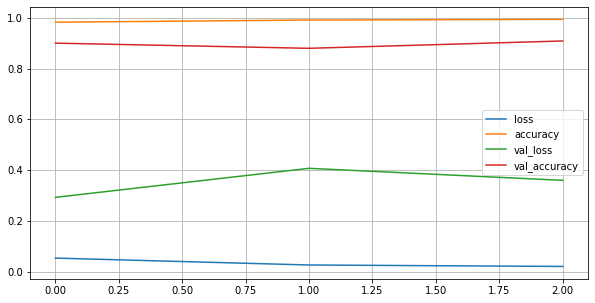

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.gca()
plt.show()

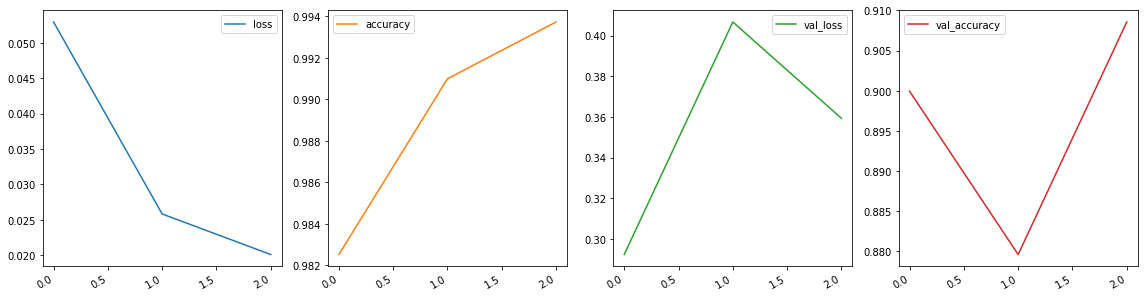

In [ ]:
pd.DataFrame(history.history).plot(figsize=(16, 16), layout=(4,4), subplots=True)
plt.tight_layout()
plt.show()

# ADD history

In [ ]:
history = {'loss':[],'accuracy':[],'val_loss':[], 'val_accuracy':[]}

In [ ]:
from copy import copy
def addNewHistory(old_history,new_history):
    history = copy(old_history)
    for i in old_history.keys():
        # print(i)
        history[i]+=new_history.history[i]
    return history

In [ ]:
history = addNewHistory(history,new_history)

In [ ]:
pickle.dump((history), open(r"/content/drive/MyDrive/graduation project (ML)/model_5/history_3epoch.pickle", "wb") )

In [ ]:
history = pickle.load(open(r"/content/drive/MyDrive/graduation project (ML)/model_5/history_3epoch.pickle", "rb"))

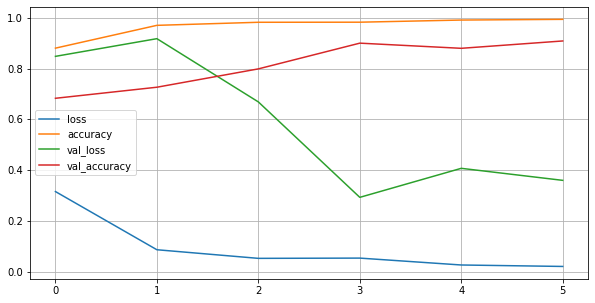

In [ ]:
pd.DataFrame(history).plot(figsize=(10, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.gca()
plt.show()

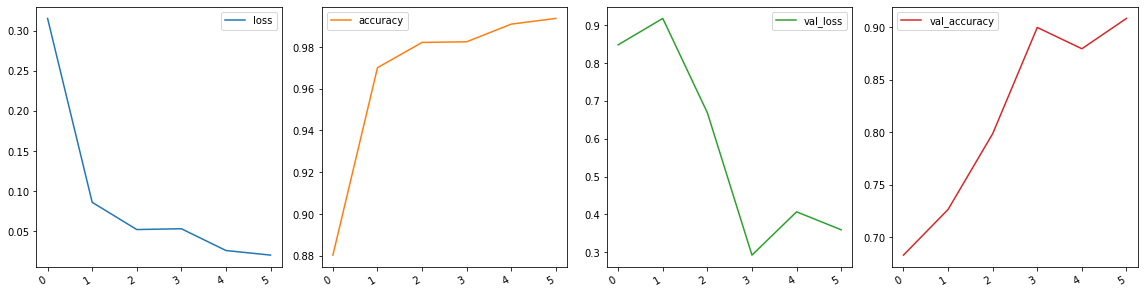

In [ ]:
pd.DataFrame(history).plot(figsize=(16, 16), layout=(4,4), subplots=True)
plt.tight_layout()
plt.show()

In [ ]:
history = pickle.load(open(r"/content/drive/MyDrive/graduation project (ML)/model_5/history.pickle", "rb"))

In [ ]:
history = addNewHistory(history,new_history)

In [ ]:
pickle.dump((history), open(r"/content/drive/MyDrive/graduation project (ML)/model_5/history_10epoch.pickle", "wb") )

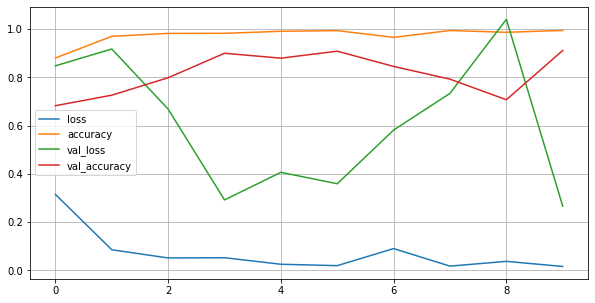

In [ ]:
pd.DataFrame(history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca()
plt.show()

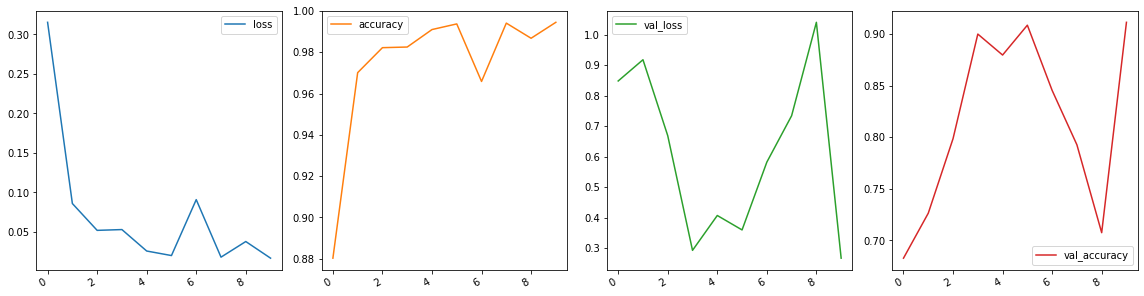

In [ ]:
pd.DataFrame(history).plot(figsize=(16, 16), layout=(4,4), subplots=True)
plt.tight_layout()
plt.show()

# Load Model for Test

In [ ]:
siamese_net = keras.models.load_model("models/model_3/model_3_5epoch_rms.h5")

# Test 1

In [ ]:
# ev = siamese_net.evaluate([pairs_test[:,0], pairs_test[:,1]], labels_test[:], steps=50)
ev = siamese_net.evaluate([pairs_train[:,0], pairs_train[:,1]], labels_train[:])
ev

540/540 [==============================] - 128s 226ms/step - loss: 0.1745 - accuracy: 0.9545


[0.17453065514564514, 0.9545139074325562]

In [ ]:
path = "dataset/test/"

In [ ]:
X,y,c=loadimgs(path,limit=True,limit_number=7)

NameError: name 'loadimgs' is not defined

In [ ]:
print(X.shape) 
print(y.shape) 

(7, 54, 100, 200, 3)
(378,)


In [ ]:
pairs_test, labels_test = make_pairs(X, y)

In [ ]:
print(pairs_test.shape)
print(labels_test.shape)

(756, 2, 100, 200, 3)
(756,)


In [ ]:
ev = siamese_net.evaluate([pairs_test[:,0], pairs_test[:,1]], labels_test[:])
ev

24/24 [==============================] - 6s 227ms/step - loss: 0.7266 - accuracy: 0.7222


[0.7266002297401428, 0.7222222089767456]

1


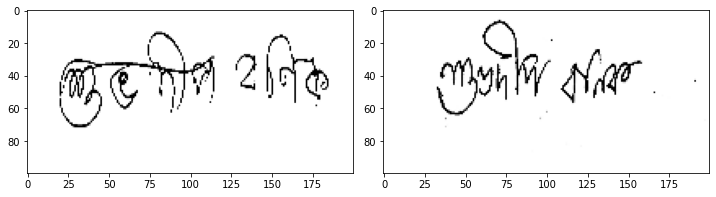

In [ ]:
i = 266

print(labels_test[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs_test[i][0],'gray')
plt.subplot(132)
plt.imshow(pairs_test[i][1],'gray')
plt.tight_layout()
plt.show()

In [ ]:
img_1 = pairs_test[i][0].copy()
img_1 = img_1.reshape(1,pairs_test[i][0].shape[0],pairs_test[i][0].shape[1],3)
img_1.shape
img_2 = pairs_test[i][1].copy()
img_2 = img_2.reshape(1,pairs_test[i][1].shape[0],pairs_test[i][1].shape[1],3)
img_2.shape

(1, 100, 200, 3)

In [ ]:
prediction_prob = siamese_net.predict([img_1, img_2])
print(prediction_prob)
print(prediction_prob.round())

[[0.5346107]]
[[1.]]


# Test 2

## Test 2

In [ ]:
path = "dataset/test/"

In [ ]:
dir_list = os.listdir(path)
len(dir_list)

100

In [ ]:
data = []
for directory in dir_list:
    images = os.listdir(path+directory)
    images = [path+directory+'/'+x for x in images]
    data.append(images[30:])

In [ ]:
len(data[0]) 

24

In [ ]:
data[6][:]

['dataset/test/007/B-S-7-G-01.tif',
 'dataset/test/007/B-S-7-G-02.tif',
 'dataset/test/007/B-S-7-G-03.tif',
 'dataset/test/007/B-S-7-G-04.tif',
 'dataset/test/007/B-S-7-G-05.tif',
 'dataset/test/007/B-S-7-G-06.tif',
 'dataset/test/007/B-S-7-G-07.tif',
 'dataset/test/007/B-S-7-G-08.tif',
 'dataset/test/007/B-S-7-G-09.tif',
 'dataset/test/007/B-S-7-G-10.tif',
 'dataset/test/007/B-S-7-G-11.tif',
 'dataset/test/007/B-S-7-G-12.tif',
 'dataset/test/007/B-S-7-G-13.tif',
 'dataset/test/007/B-S-7-G-14.tif',
 'dataset/test/007/B-S-7-G-15.tif',
 'dataset/test/007/B-S-7-G-16.tif',
 'dataset/test/007/B-S-7-G-17.tif',
 'dataset/test/007/B-S-7-G-18.tif',
 'dataset/test/007/B-S-7-G-19.tif',
 'dataset/test/007/B-S-7-G-20.tif',
 'dataset/test/007/B-S-7-G-21.tif',
 'dataset/test/007/B-S-7-G-22.tif',
 'dataset/test/007/B-S-7-G-23.tif',
 'dataset/test/007/B-S-7-G-24.tif']

In [ ]:
img_h, img_w, img_ch = 100, 200 , 3

15
['dataset/test/016/B-S-16-G-05.tif', 'dataset/test/016/B-S-16-G-03.tif', 'dataset/test/016/B-S-16-G-20.tif']


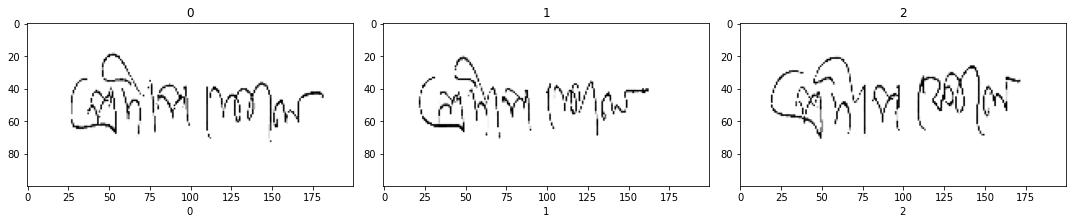

In [ ]:
visualize_sample_signature(choose=True,idx=15)

In [ ]:
ff = generate_batch(data, batch_size = 32)
pairs, targets = next(ff)
pairs, targets = next(ff)

pairs, targets = np.array(pairs), np.array(targets)

In [ ]:
print(pairs.shape)
print(targets.shape)

(2, 32, 100, 200, 3)
(32,)


In [ ]:
print(targets)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0.]


0.0


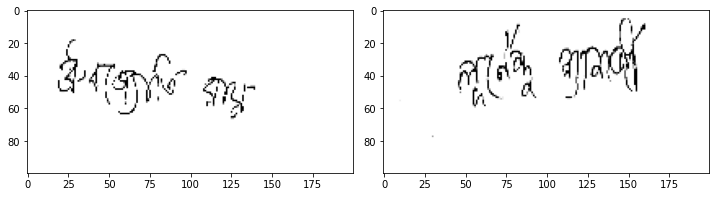

In [ ]:
i = 3

print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

In [ ]:
batch_sz = 32
num_test_samples = len(data) * len(data[0]) * 2
# steps_per_epoch = num_train_samples//batch_sz,
num_test_samples

4800

In [ ]:
ev = siamese_net.evaluate(generate_batch(data, batch_size = batch_sz), steps = num_test_samples//batch_sz,)
ev

150/150 [==============================] - 179s 1s/step - loss: 0.5094 - accuracy: 0.8050


[0.5094283223152161, 0.8050000071525574]

## Test 2 another way

In [ ]:
i = 1

print(targets[i])

img_1 = pairs[0][i].copy()
print(img_1.shape)
img_1 = img_1.reshape(1, pairs[0][i].shape[0], pairs[0][i].shape[1], pairs[0][i].shape[2])
print(img_1.shape)
img_2 = pairs[1][i].copy()
print(img_2.shape)
img_2 = img_2.reshape(1, pairs[0][i].shape[0], pairs[0][i].shape[1], pairs[0][i].shape[2])
print(img_2.shape)

0.0
(100, 200, 3)
(1, 100, 200, 3)
(100, 200, 3)
(1, 100, 200, 3)


0.0


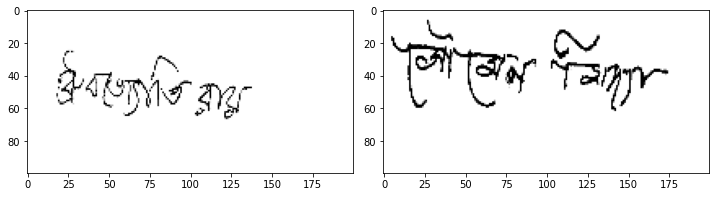

In [ ]:
print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

In [ ]:
prediction_prob = siamese_net.predict([img_1, img_2])
print(prediction_prob)
print(prediction_prob.round())
print(prediction_prob[0][0].round())

[[0.6091775]]
[[1.]]
1.0


In [ ]:
d = generate_batch(data, batch_size = 1)
pairs, targets = next(d)
pairs, targets = next(d)
pairs, targets = next(d)

print(np.array(pairs).shape)

i = 0

print(targets[i])

img_1 = pairs[0].copy()
print(img_1.shape)

# img_2 = pairs[1][i].copy()
# print(img_2.shape)

img_2 = pairs[1].copy()
print(img_2.shape)


(2, 1, 100, 200, 3)
1.0
(1, 100, 200, 3)
(1, 100, 200, 3)


1.0


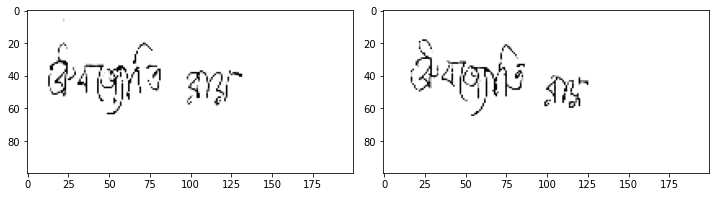

In [ ]:
print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

In [ ]:
prediction_prob = siamese_net.predict([pairs[0], pairs[1]])
print(prediction_prob)
print(prediction_prob.round())
print(prediction_prob[0][0].round())

[[0.7506307]]
[[1.]]
1.0


## Test 2 another way

In [ ]:
d = generate_batch(data, batch_size = 5)
pairs, targets = next(d)

In [ ]:
prediction_prob = siamese_net.predict([pairs[0], pairs[1]])
print(prediction_prob)
print(prediction_prob.round())
print(prediction_prob[0][0].round())
print(prediction_prob.round().flatten())

[[0.86238354]
 [0.11163066]
 [0.58783156]
 [0.00089584]
 [0.8684073 ]]
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]]
1.0
[1. 0. 1. 0. 1.]


## Test 2 another way

In [ ]:
num_test_samples = len(data) * len(data[0]) * 2
num_test_samples

4800

In [ ]:
# test_gen = generate_batch(data, batch_size = 1)
test_gen = generate_batch(data, batch_size = 100)

In [ ]:
(img1, img2), label = next(test_gen)
print(img1.shape)
print(img2.shape)
print(label)

(1, 100, 200, 3)
(1, 100, 200, 3)
[1.]


In [ ]:
# %%time
# y_true, y_pred = [], []
# for i in range(num_test_samples):
#     (img1, img2), label = next(test_gen)
#     y_true.append(label)
#     y_pred.append(siamese_net.predict([img1, img2])[0][0].round())

In [ ]:
%%time
y_true, y_pred = [], []
for i in range(num_test_samples//100):
    (img1, img2), label = next(test_gen)
    y_true.extend(label.tolist())
    y_pred.extend(siamese_net.predict([img1, img2]).round().flatten().tolist())

Wall time: 4min 27s


In [ ]:
CM = confusion_matrix(y_true, y_pred)
print(CM)

[[2230  170]
 [ 771 1629]]


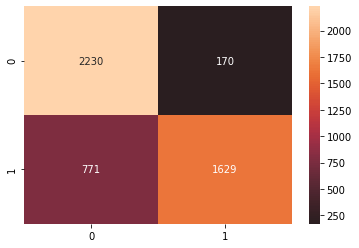

In [ ]:
sns.heatmap(CM, center = True, annot=True, fmt="d")
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.83      2400
         1.0       0.91      0.68      0.78      2400

    accuracy                           0.80      4800
   macro avg       0.82      0.80      0.80      4800
weighted avg       0.82      0.80      0.80      4800



In [ ]:
test_gen = generate_batch(data, batch_size = 1)

In [ ]:
def predict_score():
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]
    print(img1.shape)
    print(np.squeeze(img1).shape)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')

    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    
    result = siamese_net.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)

(1, 100, 200, 3)
(100, 200, 3)


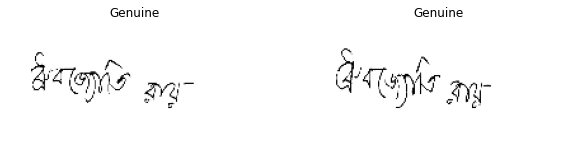

Difference Score =  0.9002534


In [ ]:
predict_score()

# Test 3

In [ ]:
# siamese_net = keras.models.load_model(r"/content/drive/MyDrive/graduation project (ML)/model_5/Train 5/signet-002.h5")

In [ ]:
img_h, img_w, img_ch = 150, 300, 1
image_shape = (img_h, img_w, img_ch)
image_shape

(150, 300, 1)

In [ ]:
path = "/content/BHSig260/Bengali/"
path = "/content/BHSig260/Hindi/"

In [ ]:
dir_list = next(os.walk(path))[1]
dir_list.sort(reverse=True)
# dir_list.sort()
len(dir_list)

160

In [ ]:
dir_list = shuffle(dir_list)

In [ ]:
orig_groups, forg_groups = [], []
for i,directory in enumerate(dir_list):
  if i==10:
    break
  images = os.listdir(path+directory)
  images.sort()
  images = [path+directory+'/'+x for x in images]
  forg_groups.append(images[:30]) 
  orig_groups.append(images[30:]) 

In [ ]:
print(len(orig_groups))
print(len(forg_groups))
print(len(orig_groups[0]))
print(len(forg_groups[0]))

10
10
24
30


In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]
print(orig_lengths)
print(forg_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


In [ ]:
kernel = np.ones((9,9),np.uint8) # default
def preprocessor_img(path, image_shape):
  image = cv2.imread(path,0)
  blured = cv2.GaussianBlur(image, (9,9), 0)
  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=30)
  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea) 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(cropped, image_shape, interpolation=cv2.INTER_LANCZOS4)
  # resized_blured = cv2.GaussianBlur(resized, (9,9), 0)
  threshold, resized_binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return resized_binary

In [ ]:
num_samples = 0

In [ ]:
def generate_batch(orig_data, forg_data, batch_size = 32):

    global num_samples

    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 288 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 160 * 276 = 44160
        # Total number of Genuine-Forged pairs = 160 * 288 = 46080
        # Total no. of data points = 44160 + 46080 = 90240

        for orig, forg in zip(orig_data, forg_data):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
              forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, len(forg)))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)

        # print(len(all_pairs))
        num_samples = len(all_pairs) 
        # pairss = all_pairs

        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            img1 = preprocessor_img(pair[0], (img_w, img_h))
            img2 = preprocessor_img(pair[1], (img_w, img_h))
            # img1 = cv2.imread(pair[0],0)
            # img2 = cv2.imread(pair[1],0)
            # img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            # img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img1 = img1.astype('float32')
            img2 = img2.astype('float32')
            img1 /= 255
            img2 /= 255
            img1 = np.atleast_3d(img1)
            img2 = np.atleast_3d(img2)
            # img2 = img2[...,np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]

            k += 1
            if k == batch_size:
                # yield np.array(pairs), np.array(targets)
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
                targets=np.zeros((batch_size,))

### visualize generate_batch

In [ ]:
ff = generate_batch(orig_groups, forg_groups, batch_size = 32)
# ff = generate_batch(orig_train, forg_train, batch_size = 32)
# ff = generate_batch(orig_val, forg_val, batch_size = 32)


pairs, targets = next(ff)
pairs, targets = np.array(pairs), np.array(targets)

In [ ]:
num_samples

9960

In [ ]:
print(pairs.shape)
print(targets.shape)
print(pairs[0].shape)
print(targets)

(2, 32, 150, 300, 1)
(32,)
(32, 150, 300, 1)
[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1.]


0.0


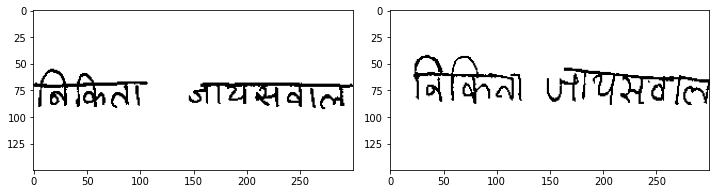

In [ ]:
i = 1

print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

### evaluate

In [ ]:
batch_sz = 100

size = len(orig_groups)

num_train_samples = 276*size + 288*size
num_val_samples = num_test_samples = 276*size + 288*size

num_train_samples = num_val_samples = num_test_samples = 9960

num_train_samples, num_val_samples, num_test_samples, num_train_samples//batch_sz, size, batch_sz

(9960, 9960, 9960, 99, 10, 100)

In [ ]:
# Bengali
ev = siamese_net.evaluate(
                            generate_batch(orig_groups, forg_groups, batch_size = batch_sz), 
                            steps = num_test_samples//batch_sz,
                            )
ev

99/99 [==============================] - 206s 2s/step - loss: 0.4900 - accuracy: 0.8210


[0.49004265666007996, 0.8210101127624512]

In [ ]:
# Hindi
ev = siamese_net.evaluate(
                            generate_batch(orig_groups, forg_groups, batch_size = batch_sz), 
                            steps = num_test_samples//batch_sz,
                            )
ev

99/99 [==============================] - 206s 2s/step - loss: 0.4316 - accuracy: 0.8358


[0.4316082298755646, 0.8357575535774231]

# Test 4

In [ ]:
# siamese_net = keras.models.load_model(r"/content/drive/MyDrive/graduation project (ML)/model_5/Train 4/model_10epoch.h5")

In [ ]:
img_h, img_w, img_ch = 150, 300, 1
image_shape = (img_h, img_w, img_ch)
image_shape

(150, 300, 1)

In [ ]:
path = "/content/cedar/"

In [ ]:
dir_list = next(os.walk(path))[1]
# dir_list.sort(key=int,reverse=True)
dir_list.sort(key=int)
len(dir_list)

55

In [ ]:
dir_list = shuffle(dir_list)

In [ ]:
dir_list[:10]

['21', '36', '15', '13', '54', '30', '46', '11', '43', '7']

In [ ]:
orig_groups, forg_groups = [], []

In [ ]:
for i,directory in enumerate(dir_list):
  if i==10:
    break
  images = os.listdir(path+directory)
  images.sort()
  images = [path+directory+'/'+x for x in images]
  forg_groups.append(images[:24]) 
  orig_groups.append(images[24:]) 

In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]
print(orig_lengths)
print(forg_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
[24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [ ]:
orig_groups, forg_groups = shuffle(orig_groups, forg_groups)

In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]
print(orig_lengths)
print(forg_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
[24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [ ]:
forg = forg_groups[:10]
orig = orig_groups[:10]

In [ ]:
# orig_train, orig_val = orig_groups[:45], orig_groups[45:]
# forg_train, forg_val = forg_groups[:45], forg_groups[45:]

In [ ]:
len(orig_groups), len(forg_groups), len(orig_groups[0]), len(forg_groups[0])

(10, 10, 24, 24)

In [ ]:
orig_groups[0], forg_groups[0] 

(['/content/cedar/19/original_19_1.png',
  '/content/cedar/19/original_19_10.png',
  '/content/cedar/19/original_19_11.png',
  '/content/cedar/19/original_19_12.png',
  '/content/cedar/19/original_19_13.png',
  '/content/cedar/19/original_19_14.png',
  '/content/cedar/19/original_19_15.png',
  '/content/cedar/19/original_19_16.png',
  '/content/cedar/19/original_19_17.png',
  '/content/cedar/19/original_19_18.png',
  '/content/cedar/19/original_19_19.png',
  '/content/cedar/19/original_19_2.png',
  '/content/cedar/19/original_19_20.png',
  '/content/cedar/19/original_19_21.png',
  '/content/cedar/19/original_19_22.png',
  '/content/cedar/19/original_19_23.png',
  '/content/cedar/19/original_19_24.png',
  '/content/cedar/19/original_19_3.png',
  '/content/cedar/19/original_19_4.png',
  '/content/cedar/19/original_19_5.png',
  '/content/cedar/19/original_19_6.png',
  '/content/cedar/19/original_19_7.png',
  '/content/cedar/19/original_19_8.png',
  '/content/cedar/19/original_19_9.png'],


In [ ]:
kernel = np.ones((9,9),np.uint8) # default
def preprocessor_img(path, image_shape):
  image = cv2.imread(path,0)
  blured = cv2.GaussianBlur(image, (9,9), 0)
  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=30)
  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea) 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(cropped, image_shape, interpolation=cv2.INTER_LANCZOS4)
  # resized_blured = cv2.GaussianBlur(resized, (9,9), 0)
  threshold, resized_binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return resized_binary

In [ ]:
num_samples = 0

In [ ]:
def generate_batch(orig_data, forg_data, batch_size = 32):

    global num_samples

    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 288 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 160 * 276 = 44160
        # Total number of Genuine-Forged pairs = 160 * 288 = 46080
        # Total no. of data points = 44160 + 46080 = 90240

        for orig, forg in zip(orig_data, forg_data):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
              forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, len(forg)))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)

        # print(len(all_pairs))
        num_samples = len(all_pairs) 
        # pairss = all_pairs

        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            img1 = preprocessor_img(pair[0], (img_w, img_h))
            img2 = preprocessor_img(pair[1], (img_w, img_h))
            # img1 = cv2.imread(pair[0],0)
            # img2 = cv2.imread(pair[1],0)
            # img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            # img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img1 = img1.astype('float32')
            img2 = img2.astype('float32')
            img1 /= 255
            img2 /= 255
            img1 = np.atleast_3d(img1)
            img2 = np.atleast_3d(img2)
            # img2 = img2[...,np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]

            k += 1
            if k == batch_size:
                # yield np.array(pairs), np.array(targets)
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
                targets=np.zeros((batch_size,))

### visualize generate_batch

In [ ]:
ff = generate_batch(orig_groups, forg_groups, batch_size = 32)
# ff = generate_batch(orig_train, forg_train, batch_size = 32)
# ff = generate_batch(orig_val, forg_val, batch_size = 32)


pairs, targets = next(ff)
pairs, targets = np.array(pairs), np.array(targets)

In [ ]:
num_samples

8520

In [ ]:
print(pairs.shape)
print(targets.shape)
print(pairs[0].shape)
print(targets)

(2, 32, 150, 300, 1)
(32,)
(32, 150, 300, 1)
[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0.]


1.0


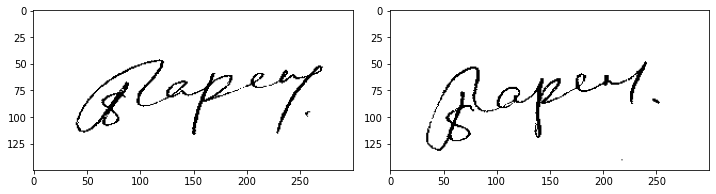

In [ ]:
i = 1

print(targets[i])

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(pairs[0][i],'gray')
plt.subplot(132)
plt.imshow(pairs[1][i],'gray')
plt.tight_layout()
plt.show()

### evaluate

In [ ]:
batch_sz = 100

size = len(orig_groups)
# size = len(orig)

num_train_samples = 276*size + 288*size
num_val_samples = num_test_samples = 276*size + 288*size

num_train_samples = num_val_samples = num_test_samples = 8520

num_train_samples, num_val_samples, num_test_samples, num_train_samples//batch_sz, size, batch_sz

(8520, 8520, 8520, 85, 10, 100)

In [ ]:
# cedar
ev = siamese_net.evaluate(
                            generate_batch(orig_groups, forg_groups, batch_size = batch_sz), 
                            steps = num_test_samples//batch_sz,
                            )
# ev = siamese_net.evaluate(
#                             generate_batch(orig, forg, batch_size = batch_sz), 
#                             steps = num_test_samples//batch_sz,
#                             )
ev

85/85 [==============================] - 172s 2s/step - loss: 0.1477 - accuracy: 0.9433


[0.14774958789348602, 0.943294107913971]

# test 5

In [ ]:
from platform import python_version
print(python_version())
print()

3.7.10



In [ ]:
!which python

/usr/local/bin/python


In [ ]:
siamese_net = keras.models.load_model(r"/content/drive/MyDrive/graduation project (ML)/model_5/Train 11/model_34.h5")

In [ ]:
# siamese_net.save(r"/content/drive/MyDrive/graduation project (ML)/model_5/Train 11/model_34")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/graduation project (ML)/model_5/Train 11/model_34/assets


In [ ]:
# siamese_net = keras.models.load_model(r"/content/drive/MyDrive/graduation project (ML)/model_5/Train 11/model_34")

In [ ]:
print(siamese_net.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 69120)        18315712    input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 69120)        0           sequential[0][0]             

In [ ]:
img_h, img_w, img_ch = 150, 300, 1
image_shape = (img_h, img_w, img_ch)
image_shape

(150, 300, 1)

In [ ]:
path = "/content/drive/MyDrive/graduation project (ML)/datasets/1_test"

In [ ]:
dir_path, dirnames, filenames = next(os.walk(path))
filenames.sort()
len(filenames), dir_path, dirnames, filenames

(4,
 '/content/drive/MyDrive/graduation project (ML)/datasets/1_test',
 [],
 ['g (1).png', 'g (2).png', 'g (3).png', 'img.png'])

In [ ]:
images = []

In [ ]:
images = [path+'/'+x for x in filenames]

In [ ]:
images

['/content/drive/MyDrive/graduation project (ML)/datasets/1_test/g (1).png',
 '/content/drive/MyDrive/graduation project (ML)/datasets/1_test/g (2).png',
 '/content/drive/MyDrive/graduation project (ML)/datasets/1_test/g (3).png',
 '/content/drive/MyDrive/graduation project (ML)/datasets/1_test/img.png']

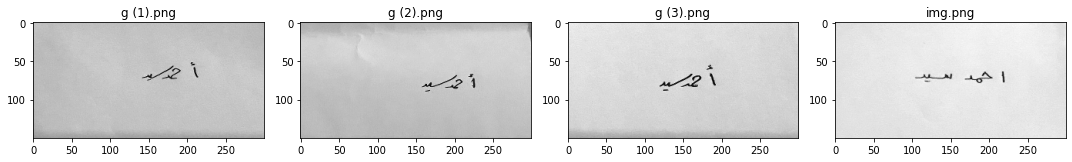

In [ ]:
img1 = cv2.imread(images[0],0)
img2 = cv2.imread(images[1],0)
img3 = cv2.imread(images[2],0)
img4 = cv2.imread(images[3],0)


img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
img3 = cv2.resize(img3, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
img4 = cv2.resize(img4, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)

plt.figure(figsize = (15, 10))

plt.subplot(141)
plt.imshow(img1,'gray')
plt.title(filenames[0])
plt.subplot(142)
plt.imshow(img2,'gray')
plt.title(filenames[1])
plt.subplot(143)
plt.imshow(img3,'gray')
plt.title(filenames[2])
plt.subplot(144)
plt.imshow(img4,'gray')
plt.title(filenames[3])

plt.tight_layout()
plt.show()

In [ ]:
# list(itertools.combinations(images[:-1], 2))

In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
kernel = np.ones((9,9),np.uint8) # default
def preprocessor_img(path, image_shape):
  image = cv2.imread(path,0)
  blured = cv2.GaussianBlur(image, (9,9), 0)
  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=30)
  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea) 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(cropped, image_shape, interpolation=cv2.INTER_LANCZOS4)
  # resized_blured = cv2.GaussianBlur(resized, (9,9), 0)
  threshold, resized_binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return resized_binary

In [ ]:
def make_pairs(images):

  all_pairs = []

  test_image= images[-1]
  originals_images = images[:]

  for i,img in enumerate(originals_images):
    x1 = img
    x2 = test_image
    all_pairs += [[x1, x2]]

  
  # all_pairs = list(itertools.combinations(images[:-1], 2))

  pairs=[]

  for ix, pair in enumerate(all_pairs):
    img1 = preprocessor_img(pair[0], (img_w, img_h))
    img2 = preprocessor_img(pair[1], (img_w, img_h))
    # img1 = cv2.imread(pair[0],0)
    # img2 = cv2.imread(pair[1],0)
    # img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    # img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    img1 = img1.astype('float32')
    img2 = img2.astype('float32')
    img1 /= 255
    img2 /= 255
    img1 = np.atleast_3d(img1)
    img2 = np.atleast_3d(img2)
    pairs.append([img1, img2])
  
  pairs = np.array(pairs)
  return pairs

In [ ]:
paris_images = make_pairs(images)

In [ ]:
paris_images.shape

(4, 2, 150, 300, 1)

In [ ]:
paris_images[:,0].shape

(4, 150, 300, 1)

In [ ]:
paris_images[0,0].shape

(150, 300, 1)

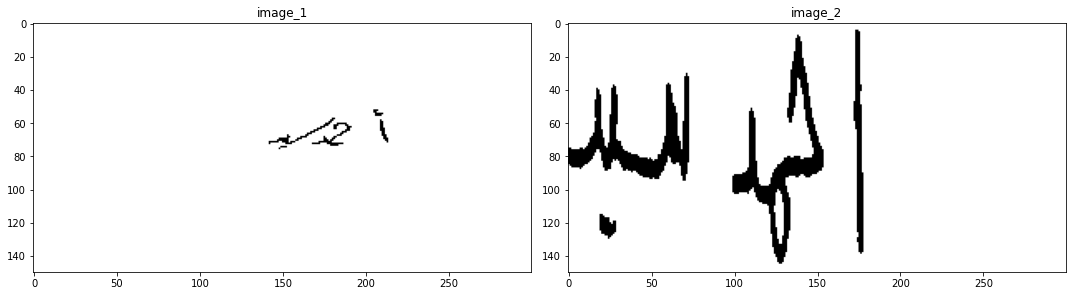

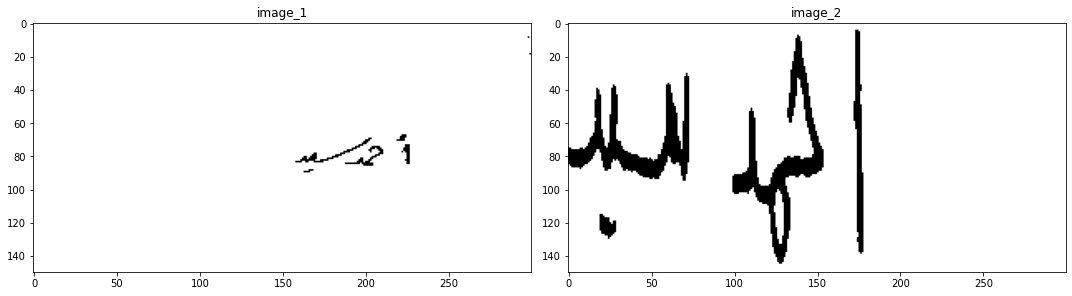

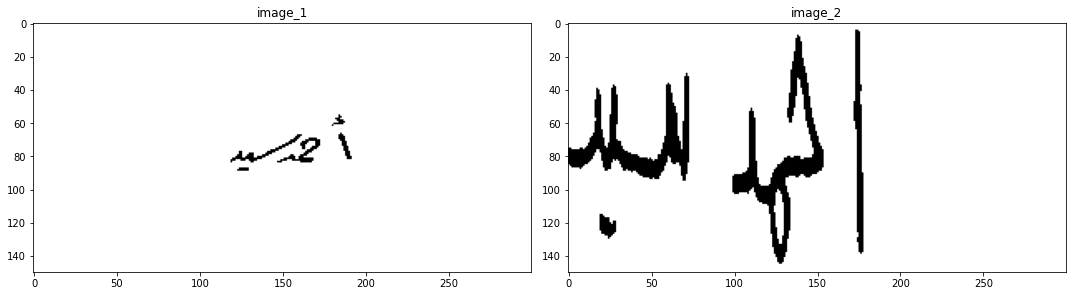

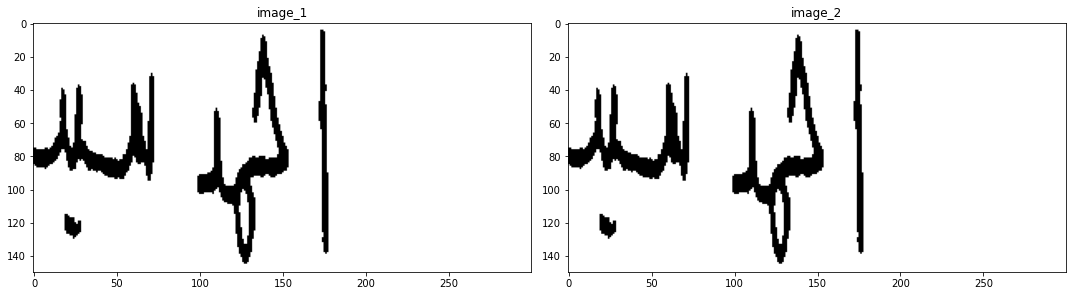

In [ ]:
for ix, pair in enumerate(paris_images):
  plt.figure(figsize = (15, 10))
  plt.subplot(121)
  plt.imshow(pair[0],'gray')
  plt.title("image_1")
  plt.subplot(122)
  plt.imshow(pair[1],'gray')
  plt.title("image_2")
  plt.tight_layout()
  plt.show()

In [ ]:
# i = 0
# plt.figure(figsize = (15, 10))
# plt.subplot(121)
# plt.imshow(paris_images[i,0],'gray')
# plt.subplot(122)
# plt.imshow(paris_images[i,1],'gray')
# plt.tight_layout()
# plt.show()

In [ ]:
prediction_prob = siamese_net.predict([paris_images[:,0], paris_images[:,1]])
prediction_prob

array([[0.12951526],
       [0.32044363],
       [0.03803823],
       [0.8471476 ]], dtype=float32)

In [ ]:
(prediction_prob.round(2)*100).flatten().astype('int')

array([13, 32,  4, 85])

In [ ]:
i = 0
prediction_prob = siamese_net.predict([np.expand_dims(paris_images[i,0],0), np.expand_dims(paris_images[i,1],0)])
prediction_prob

array([[0.12951542]], dtype=float32)